# Lab 14 Dictionary Marvels

##  More Flexible Function Protocols


#### Remember this?

In [1]:
def DoBreakfast(meat="bacon", eggs="scrambled", toast="wheat", beverage="coffee"):
    return "Here is your {} and {} eggs with {} toast and {}.".format(
        meat, eggs, toast, beverage)

def main():
    print(DoBreakfast())
    print(DoBreakfast("steak"))
    print(DoBreakfast(beverage="oj", eggs="fried"))
    
main()

Here is your bacon and scrambled eggs with wheat toast and coffee.
Here is your steak and scrambled eggs with wheat toast and coffee.
Here is your bacon and fried eggs with wheat toast and oj.


Now that we know about `dict`s, we can do this:

In [2]:
def DoBreakfast(**this_order):
    order = {"meat":"bacon", "eggs":"scrambled", "toast":"wheat", "beverage":"coffee"}
    order.update(this_order)
    return "Here is your {meat} and {eggs} eggs with {toast} toast and {beverage}.".format(
        **order)

def main():
    print(DoBreakfast())
    print(DoBreakfast(beverage="oj", eggs="fried"))
    
main()

Here is your bacon and scrambled eggs with wheat toast and coffee.
Here is your bacon and fried eggs with wheat toast and oj.


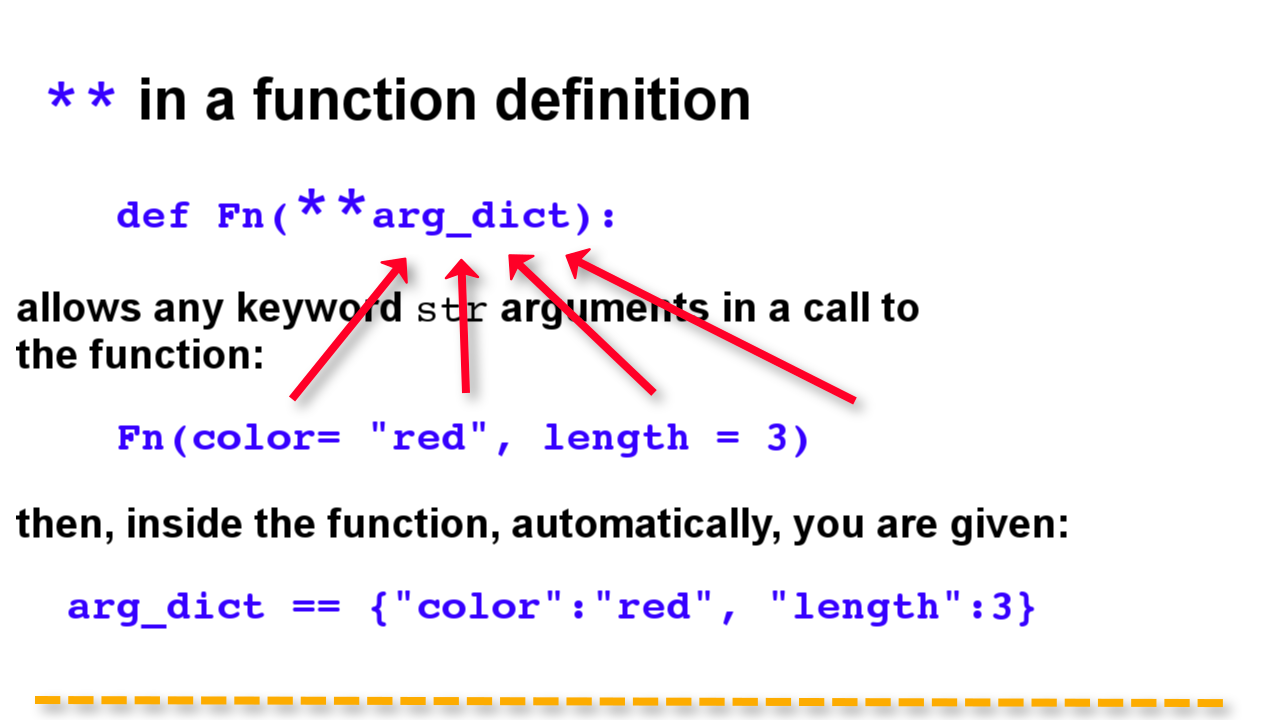

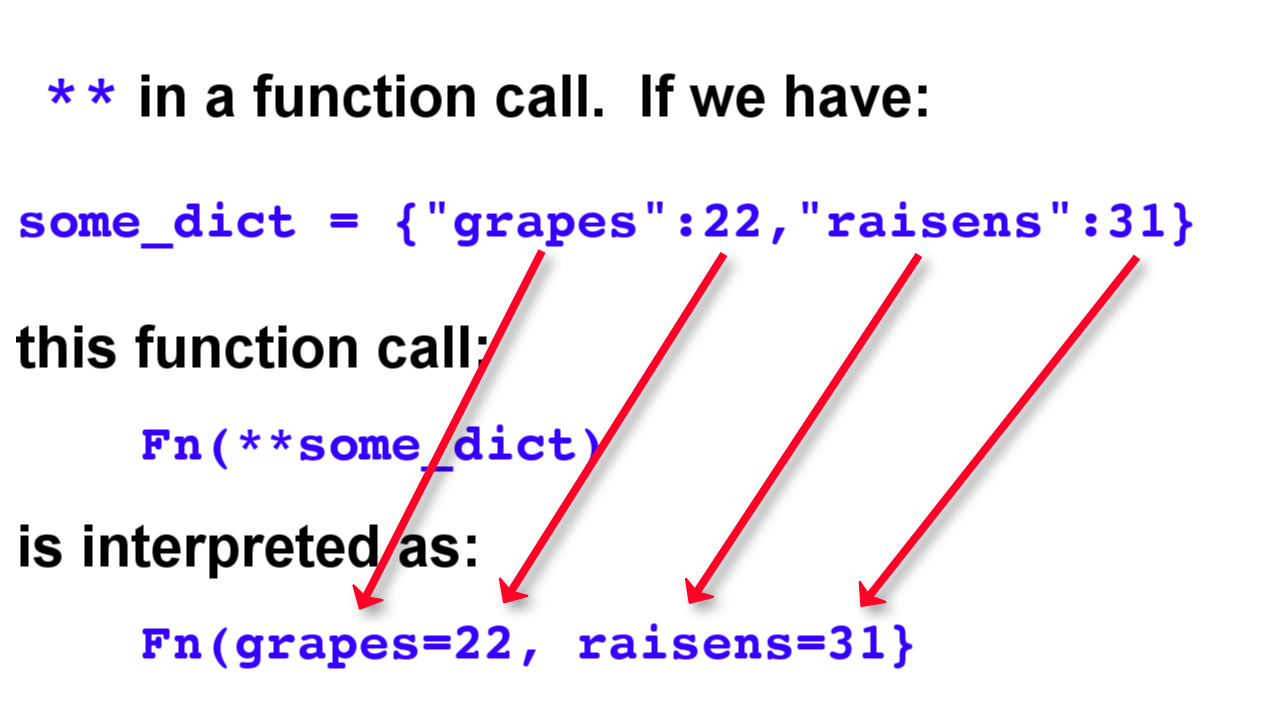

## Format Replacement With A Dictionary
### `locals()` Dictionary

In [3]:

def ReportAnimals(insect, bird, **more):
    cat = "Persian"
    fish = "platies"
    print("locals():", locals())
    locals().update(more)
    print("After update:")
    print("locals():", locals())
    print("Format trick:")
    print("dog={dog}, bird={bird}, cat={cat}".format(**locals()))
    
ReportAnimals("moth", "robin", dog="Collie", horse="Arabian")



locals(): {'fish': 'platies', 'bird': 'robin', 'more': {'dog': 'Collie', 'horse': 'Arabian'}, 'cat': 'Persian', 'insect': 'moth'}
After update:
locals(): {'horse': 'Arabian', 'cat': 'Persian', 'insect': 'moth', 'fish': 'platies', 'bird': 'robin', 'dog': 'Collie', 'more': {'dog': 'Collie', 'horse': 'Arabian'}}
Format trick:
dog=Collie, bird=robin, cat=Persian


## DataFrame From A Dictionary

In [4]:
temps = {
    "San Jose":[87, 85, 79, 77, 90],
    "Albuquerque":[98, 101, 111, 105, 90],
    "Chapala":[77, 75, 80, 82, 78]
}

In [5]:
import pandas as pd
pd.DataFrame(temps)

,Albuquerque,Chapala,San Jose
0,98,77,87
1,101,75,85
2,111,80,79
3,105,82,77
4,90,78,90


### Often you see a `dict` with more `dict`s for its values.  Pandas likes these:

In [6]:
dimensions = {"box":{"height":13, "width":5, "depth": 12},
              "carton":{"height":22, "width":18, "depth":30},
              "paper":{"height":11, "width":8.5}}
import pandas as pd
pd.DataFrame(dimensions)

,box,carton,paper
depth,12,30,NaN
height,13,22,11.0
width,5,18,8.5


### NaN means Not A Number.

It is Pandas way of telling you that it has no number for that location in the DataFrame.  Pandas uses it from Numpy: 

In [7]:
import numpy as np
print(np.nan)

nan


# Exercises

`1.` Consider this function:

```python
def AssignItem(container):
    container[1] = ":*)"
```
> What happens with the following code snippets?  Don't test until after you've made a guess:

> a. 
```python
shapes = ["dot", "square", "triangle"]
AssignItem(shapes)
print(shapes)
```

> b.
```python
fruits = {"peach":"sweet",
          "lemon":"sour",
          "kiwi":"tangy"}
AssignItem(fruits)
print(fruits)
```

> c.
```python
name = "Rasmus"
AssignItem(name)
print(name)
```

`2.` Create a `MakeBouquet` function that accepts any keyworded arguments.  With no arguments, this call:

```python
print(MakeBouquet()) 
```
produces this output, but the flowers are not in any particular order:
> ```Here is your beautiful bouquet of red roses, white carnations, and yellow tulips.
```

```python
print(MakeBouquet(lilies="white", carnations="pink", ferns="green"))
```
produces this output:
> ```Here is your beautiful bouquet of green ferns, pink carnations, red roses, white lilies, and yellow tulips.
```

What do you get with:
```python
print(MakeBouquet(grapes="purple", sponges="bob"))
```

`3.` In your function definitions, you can mix in regular positional and defaulted arguments as well as the **   argument. For example:

> Make some more calls to `ReportOn` and be sure you understand.

`4.` Create a PrintRecipe function that requires the name of the recipe. The number of servings may or may not be given in the call because the default it 4.  The ingredients are given as keyword arguments.

This call:

```python
PrintRecipe("Mayonaise", oil="1 C", yolks = "2", lemonjuice = "1 t", mustard = "1/2 t")
```
produces this output:

```python
  Mayonaise for 4 servings
 
  Ingredients

           2    yolks           
         1 C    oil         
       1/2 t    mustard       
         1 t    lemonjuice
```

`5.` Here are some data extracted from the "Texas Beer Project" at ```https://data.world/gswider/the-texas-beer-project?utm_campaign=data_digest&utm_source=email&utm_medium=email&utm_content=180706&_hsenc=p2ANqtz-_UZp7F5pofUA94p5IQM23YvCAuMFuVPlxuU3iy6JqPaazn-NTyyg8LcDHAMpQckr8z25SbqRSGMu6pv6aUR_JAqKJO3A&_hsmi=64286295```

Write a `ReportBestBrews(state)` function such that this call:
```python
ReportBestBrews("Oklahoma")
```
produces this output:
> ```Oklahoma:  Pete's Place Restaurant & Brewery brewpub,  brewer tap room, RePUBlic Gastropub bar.```


> Hint:  The `best_brews` data is definited globally, or "in the module namespace".  This means that functions defined in the same file, if they are defined after `best_brews`, can use it.

'6.'  Make a Pandas DataFrame with the `best_brews` data.

> Perhaps you don't like how it looks and you wish the rows were the columns and the columns were the rows.
Try this:

```python
brew_frame.T
```
to fix that.

> Perhaps you'd like to see just a few rows of the data.  Try this:

```python
brew_frame.T.head(3)
```